# Nature Conservancy Fisheries Kaggle Competition
## Propigate 'NoF' labels to fovea where KNN classifier is confident
#### Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import fish_data as fd
import pickle
import os
import pandas as pd
from scipy import ndimage, misc
from sklearn.neighbors import KNeighborsClassifier

### Retrieve master dictionary

In [2]:
with open('coordinates_dictionary.pickle', 'rb') as handle:
    master_dict = pickle.load(handle)

print("Master dictionary loaded and contains correct number of filenames: {}".format(len(master_dict)==3777))

Master dictionary loaded and contains correct number of filenames: True


### Retrieve checkpointed fovea_labels_checkpoint.csv

In [3]:
df = pd.read_csv('fovea_labels_checkpoint.csv', index_col = 0) # the writing of this file was accidentally covered up when I commited a file that had not been saved due to its size. 

### Generate table of embeddings that corresponds to df and master_dict order

In [4]:
embedding_arr = []

for f in master_dict :
    embedding_arr.append(master_dict.get(f).get('embedding_array'))

X_df = pd.DataFrame(np.concatenate(embedding_arr, 0))

### Tests

In [5]:
print("Shape of fovea set information: {}".format(df.shape))
print("Shape of embedding dataframe: {}".format(X_df.shape))

Shape of fovea set information: (60432, 4)
Shape of embedding dataframe: (60432, 5408)


In [6]:
print(df['fovea_label'].value_counts())

Unknown    58800
NoF         1358
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64


### Write function to assign 'NoF' when a KNN is confident of the fovea label

In [7]:
def knn_label_prop(threshold = 0.9) :
    print(df['fovea_label'].value_counts())
    for fish in df['image_label'].unique() :
        print("="*40,fish,"="*40)
        temp_df = df.ix[ df['image_label'] == fish, :]
        temp_bonafide = temp_df.ix[ temp_df['fovea_label'] != 'Unknown', : ]
        temp_unk = temp_df.ix[ temp_df['fovea_label'] == 'Unknown', : ]
        
        ix, ix_bf, ix_unk = temp_df.index, temp_bonafide.index, temp_unk.index
        
        knn = KNeighborsClassifier(n_neighbors = 50, weights = 'distance')
        knn.fit(X_df.iloc[ix_bf,:], temp_bonafide['fovea_label'].replace({fish: 1, 'NoF' : 0}))
        
        preds = knn.predict_proba(X_df.iloc[ix_unk, :])
        plt.figure()
        plt.hist(preds[:, 0], bins = 20)
        plt.title("KNN probability of 'NoF' fovea label")
        plt.show()
        
        bool_pred = preds[:, 0] > threshold
        temp_unk['Pred_NoF'] = bool_pred  #attach boolean predictions as to retrieve proper indices
        
        ix_prop = temp_unk.ix[ temp_unk['Pred_NoF'] == True, :].index
        
        df['fovea_label'].iloc[ix_prop] = 'NoF'
        
        print(df['fovea_label'].value_counts())
        
        

Unknown    58800
NoF         1358
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64
======================================== ALB ========================================


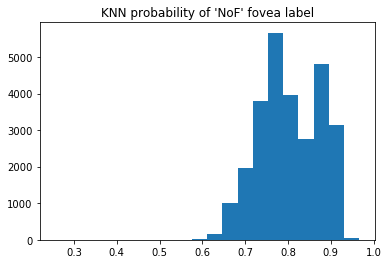

/Users/ccthomps/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unknown    55997
NoF         4161
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64
======================================== NoF ========================================


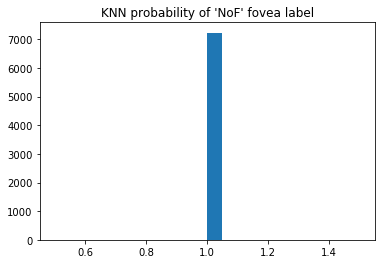

Unknown    48765
NoF        11393
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64
======================================== SHARK ========================================


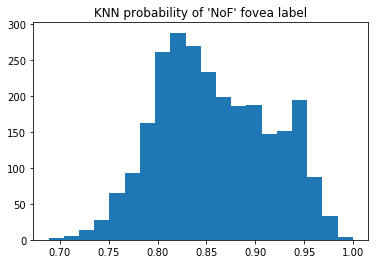

Unknown    48016
NoF        12142
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64
======================================== YFT ========================================


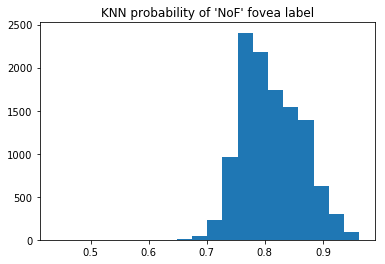

Unknown    47276
NoF        12882
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64
======================================== OTHER ========================================


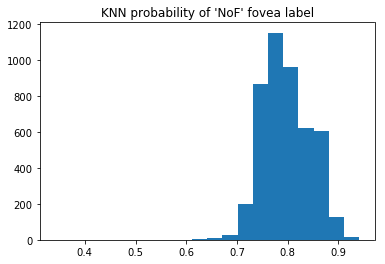

Unknown    47246
NoF        12912
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64
======================================== BET ========================================


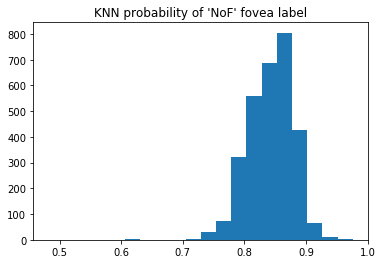

Unknown    47148
NoF        13010
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64
======================================== DOL ========================================


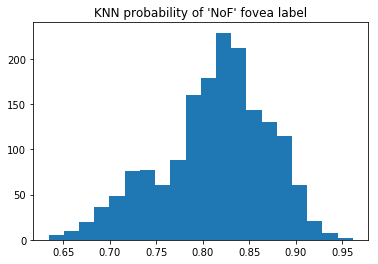

Unknown    47064
NoF        13094
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64
======================================== LAG ========================================


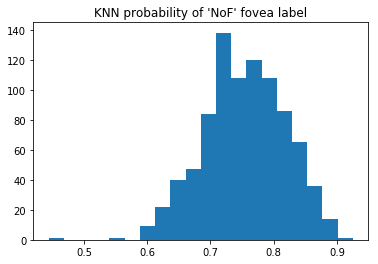

Unknown    47062
NoF        13096
LAG           48
ALB           47
OTHER         39
SHARK         36
BET           35
DOL           35
YFT           34
Name: fovea_label, dtype: int64


In [8]:
knn_label_prop()

In [9]:
df.to_csv('fovea_labels_NoF_prop.csv')